In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv', delimiter=';')

In [3]:
df['set'] = 'train'
df.set[df.hits=="\\N"] = 'pred'
df.session_durantion[df['session_durantion']=="\\N"]=0
df.session_durantion = df.session_durantion.astype('int')
df.session_durantion[df.session_durantion==0] = df.session_durantion[df.session_durantion!=0].mean()    

C:\Users\karah\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\karah\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\karah\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
train = df[df['set'] == 'train'].copy()

In [5]:
train.hits.shape

(619235,)

In [6]:
time = train[['day_of_week','hour_of_day','hits']].copy()
time.hits = time.hits.astype('int')

In [7]:
print(set(time.hour_of_day))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [8]:
print(set(time.day_of_week))

{'Sunday', 'Saturday', 'Tuesday', 'Friday', 'Monday', 'Thursday', 'Wednesday'}


In [9]:
time

,day_of_week,hour_of_day,hits
1,Thursday,22,14
2,Saturday,21,14
3,Saturday,19,1
4,Tuesday,6,3
5,Monday,1,2
6,Friday,20,2
7,Sunday,3,3
8,Sunday,1,3
9,Sunday,5,45
10,Wednesday,15,39


In [10]:
time.groupby('day_of_week')['hits'].mean().plot.bar()

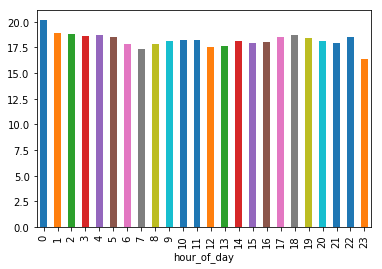

In [11]:
time.groupby('hour_of_day')['hits'].mean().plot.bar()

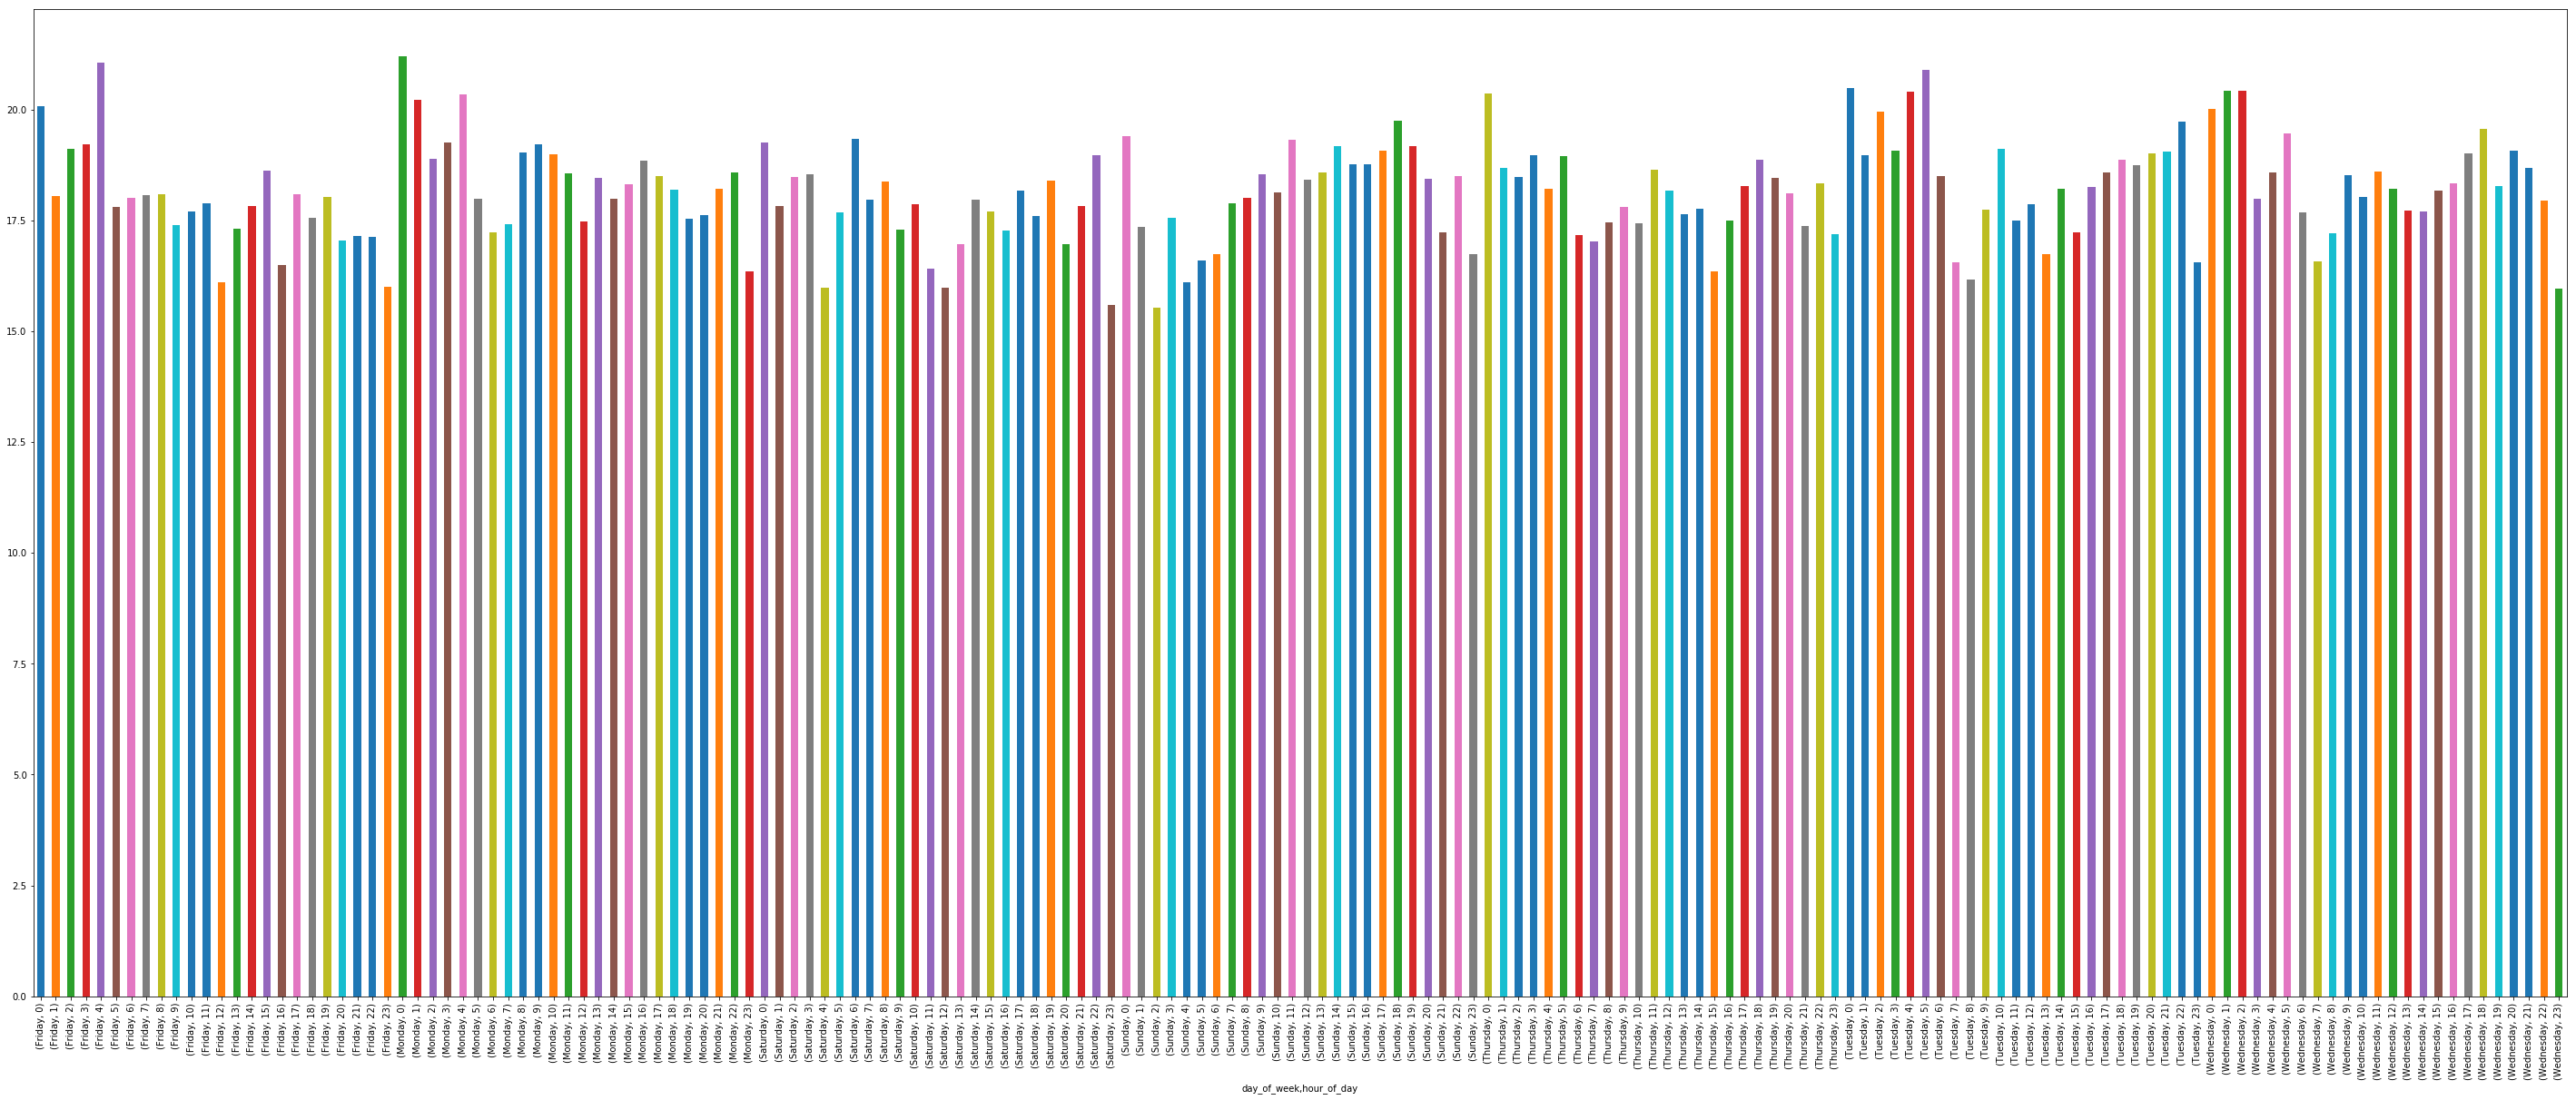

In [12]:
time.groupby(['day_of_week','hour_of_day'])['hits'].mean().plot.bar(figsize=(50,20))

In [13]:
time.hour_of_day = time.hour_of_day.astype('int')

In [14]:
len(set(time.hour_of_day))

24

In [15]:
len(set(time.day_of_week))

7

In [16]:
set(time.day_of_week)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [17]:
dow_dict = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}

In [18]:
time.shape

(619235, 3)

In [19]:
hod_array = np.zeros((time.shape[0],24), dtype=int)
dow_array = np.zeros((time.shape[0],7), dtype=int)

In [21]:
i = 0
for row in time.itertuples():
    hod = getattr(row, 'hour_of_day')
    dow = getattr(row, 'day_of_week')
    hod_array[i, hod] = 1
    dow_array[i, int(dow_dict[dow])] = 1
    i = i + 1

In [22]:
hod_array

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
dow_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
combined = np.hstack((hod_array,dow_array))

In [25]:
indices = time.index.values

In [26]:
dow_head = list(dow_dict.keys())

In [27]:
hod_head = [''+str(x) for x in set(time.hour_of_day)]

In [28]:
df_head = hod_head + dow_head

In [29]:
time_df = pd.DataFrame(data=combined, index=indices, columns=df_head)

In [30]:
time_df['hits'] = time.hits.copy()

In [31]:
time_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hits
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,45
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,39


In [32]:
time_df.to_csv('input/timedf.csv')